In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

pd.set_option("display.max_columns", None) #no limit on shown pandas columns

In [2]:
path_X_train =  '.\\data\\raw\\training_set_features.csv' 
path_y_train = '.\\data\\raw\\training_set_labels.csv'
X_raw = pd.read_csv(path_X_train)
y_raw = pd.read_csv(path_y_train)

In [3]:
df_og = pd.concat([X_raw,y_raw.iloc[:,1:]],axis=1)
df = df_og.copy()

### Quick look at the data

In [4]:
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [6]:
df_cat = df.astype('category')
df_cat = df_cat.astype({'respondent_id':'int64','household_adults':'float64', 'household_children':'float64' ,'h1n1_vaccine':'int64', 'seasonal_vaccine':'int64'})
df_cat.set_index('respondent_id', inplace=True)

In [8]:
df_enc = pd.get_dummies(df_cat)

In [9]:
df_enc.head()

,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,h1n1_concern_0.0,h1n1_concern_1.0,h1n1_concern_2.0,h1n1_concern_3.0,h1n1_knowledge_0.0,h1n1_knowledge_1.0,h1n1_knowledge_2.0,behavioral_antiviral_meds_0.0,behavioral_antiviral_meds_1.0,behavioral_avoidance_0.0,behavioral_avoidance_1.0,behavioral_face_mask_0.0,behavioral_face_mask_1.0,behavioral_wash_hands_0.0,behavioral_wash_hands_1.0,behavioral_large_gatherings_0.0,behavioral_large_gatherings_1.0,behavioral_outside_home_0.0,behavioral_outside_home_1.0,behavioral_touch_face_0.0,behavioral_touch_face_1.0,doctor_recc_h1n1_0.0,doctor_recc_h1n1_1.0,doctor_recc_seasonal_0.0,doctor_recc_seasonal_1.0,chronic_med_condition_0.0,chronic_med_condition_1.0,child_under_6_months_0.0,child_under_6_months_1.0,health_worker_0.0,health_worker_1.0,health_insurance_0.0,health_insurance_1.0,opinion_h1n1_vacc_effective_1.0,opinion_h1n1_vacc_effective_2.0,opinion_h1n1_vacc_effective_3.0,opinion_h1n1_vacc_effective_4.0,opinion_h1n1_vacc_effective_5.0,opinion_h1n1_risk_1.0,opinion_h1n1_risk_2.0,opinion_h1n1_risk_3.0,opinion_h1n1_risk_4.0,opinion_h1n1_risk_5.0,opinion_h1n1_sick_from_vacc_1.0,opinion_h1n1_sick_from_vacc_2.0,opinion_h1n1_sick_from_vacc_3.0,opinion_h1n1_sick_from_vacc_4.0,opinion_h1n1_sick_from_vacc_5.0,opinion_seas_vacc_effective_1.0,opinion_seas_vacc_effective_2.0,opinion_seas_vacc_effective_3.0,opinion_seas_vacc_effective_4.0,opinion_seas_vacc_effective_5.0,opinion_seas_risk_1.0,opinion_seas_risk_2.0,opinion_seas_risk_3.0,opinion_seas_risk_4.0,opinion_seas_risk_5.0,opinion_seas_sick_from_vacc_1.0,opinion_seas_sick_from_vacc_2.0,opinion_seas_sick_from_vacc_3.0,opinion_seas_sick_from_vacc_4.0,opinion_seas_sick_from_vacc_5.0,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Married,marital_status_Not Married,rent_or_own_Own,rent_or_own_Rent,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,employment_industry_arjwrbjb,employment_industry_atmlpfrs,employment_industry_cfqqtusy,employment_industry_dotnnunm,employment_industry_fcxhlnwr,employment_industry_haxffmxo,employment_industry_ldnlellj,employment_industry_mcubkhph,employment_industry_mfikgejo,employment_industry_msuufmds,employment_industry_nduyfdeo,employment_industry_phxvnwax,employment_industry_pxcmvdjn,employment_industry_qnlwzans,employment_industry_rucpziij,employment_industry_saaquncn,employment_industry_vjjrobsf,employment_industry_wlfvacwt,employment_industry_wxleyezf,employment_industry_xicduogh,employment_industry_xqicxuve,employment_occupation_bxpfxfdn,employment_occupation_ccgxvspp,employment_occupation_cmhcxjea,employment_occupation_dcjcmpih,employment_occupation_dlvbwzss,employment_occupation_emcorrxb,employment_occupation_haliazsg,employment_occupation_hfxkjkmi,employment_occupation_hodpvpew,employment_occupation_kldqjyjy,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_pvmttkik,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [12]:
#%%   
#QUICK HEATPLOT GENERATION
def heatplot(frame, target, k):
    """
    Function to generate a heatmap of your dataframe
    frame: dataframe to be used
    target: main target of your interest, all correlations will be calculated but this attribute will be the first
    k = number of variables to show, top k highest correlations (closest to -1 or 1) will show, default is (Num of Frame Attributes - 1) 
    """
    corrMatrix = frame.dropna().corr()
    cols = corrMatrix.abs().nlargest(k, target)[target].index
    cm = np.corrcoef(frame[cols].values.T)
    mask = np.zeros_like(cm)
    mask[np.triu_indices_from(mask)] = True
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, 
                    square=True, fmt='.2f',
                    mask=mask, 
                    annot_kws={'size': 8},
                    linewidths=.5, 
                    yticklabels=cols.values, 
                    xticklabels=cols.values,
                    vmax= 0.6,
                    vmin= -0.6)
    plt.show() 
    return cols.to_list()

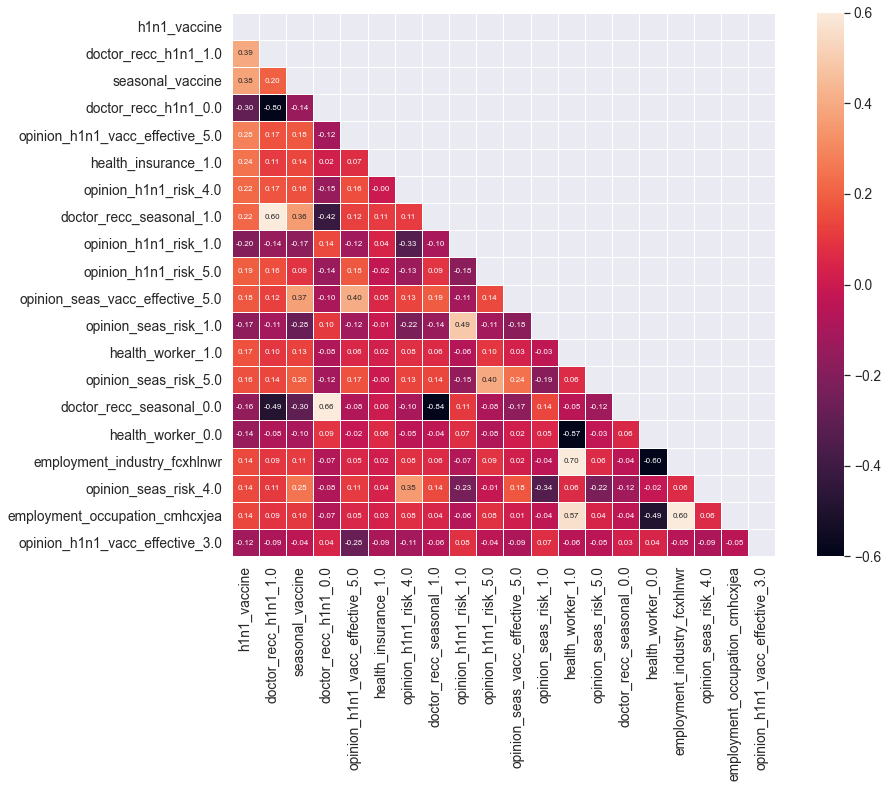

['h1n1_vaccine',
 'doctor_recc_h1n1_1.0',
 'seasonal_vaccine',
 'doctor_recc_h1n1_0.0',
 'opinion_h1n1_vacc_effective_5.0',
 'health_insurance_1.0',
 'opinion_h1n1_risk_4.0',
 'doctor_recc_seasonal_1.0',
 'opinion_h1n1_risk_1.0',
 'opinion_h1n1_risk_5.0',
 'opinion_seas_vacc_effective_5.0',
 'opinion_seas_risk_1.0',
 'health_worker_1.0',
 'opinion_seas_risk_5.0',
 'doctor_recc_seasonal_0.0',
 'health_worker_0.0',
 'employment_industry_fcxhlnwr',
 'opinion_seas_risk_4.0',
 'employment_occupation_cmhcxjea',
 'opinion_h1n1_vacc_effective_3.0']

In [16]:
plt.figure(figsize=(15,10))
heatplot(df_enc, 'h1n1_vaccine', 20)


In [15]:
df_cat.dtypes

respondent_id                     int64
h1n1_concern                   category
h1n1_knowledge                 category
behavioral_antiviral_meds      category
behavioral_avoidance           category
behavioral_face_mask           category
behavioral_wash_hands          category
behavioral_large_gatherings    category
behavioral_outside_home        category
behavioral_touch_face          category
doctor_recc_h1n1               category
doctor_recc_seasonal           category
chronic_med_condition          category
child_under_6_months           category
health_worker                  category
health_insurance               category
opinion_h1n1_vacc_effective    category
opinion_h1n1_risk              category
opinion_h1n1_sick_from_vacc    category
opinion_seas_vacc_effective    category
opinion_seas_risk              category
opinion_seas_sick_from_vacc    category
age_group                      category
education                      category
race                           category


In [ ]:
df_cat.describe(include='all')

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
count,26615.0,26591.0,26636.0,26499.0,26688.0,26665.0,26620.0,26625.0,26579.0,24547.0,24547.0,25736.0,25887.0,25903.0,14433.0,26316.0,26319.0,26312.0,26245.0,26193.0,26170.0,26707,25300,26707,26707,22284,25299,24665,25244,26707,26707,26458.0,26458.0,13377,13237,26707.000000,26707.000000
unique,4.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,5,4,4,2,3,2,2,3,10,3,4.0,4.0,21,23,NaN,NaN
top,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,1.0,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,xtkaffoo,NaN,NaN
freq,10575.0,14598.0,25335.0,19228.0,24847.0,22015.0,17073.0,17644.0,18001.0,19139.0,16453.0,18446.0,23749.0,23004.0,12697.0,11683.0,9919.0,9129.0,11629.0,8954.0,11870.0,6843,10097,21222,15858,12777,13555,18736,13560,4297,11645,14474.0,18672.0,2468,1778,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.212454,0.465608
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.409052,0.498825
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000


In [ ]:
df_cat.groupby(['h1n1_vaccine', 'seasonal_vaccine']).size()

h1n1_vaccine  seasonal_vaccine
0             0                   13295
              1                    7738
1             0                     977
              1                    4697
dtype: int64

In [ ]:
X = df_cat.iloc[:,:-2]
y = df_cat.iloc[:,-2:]

cat_attrs = X.select_dtypes(include='category').columns

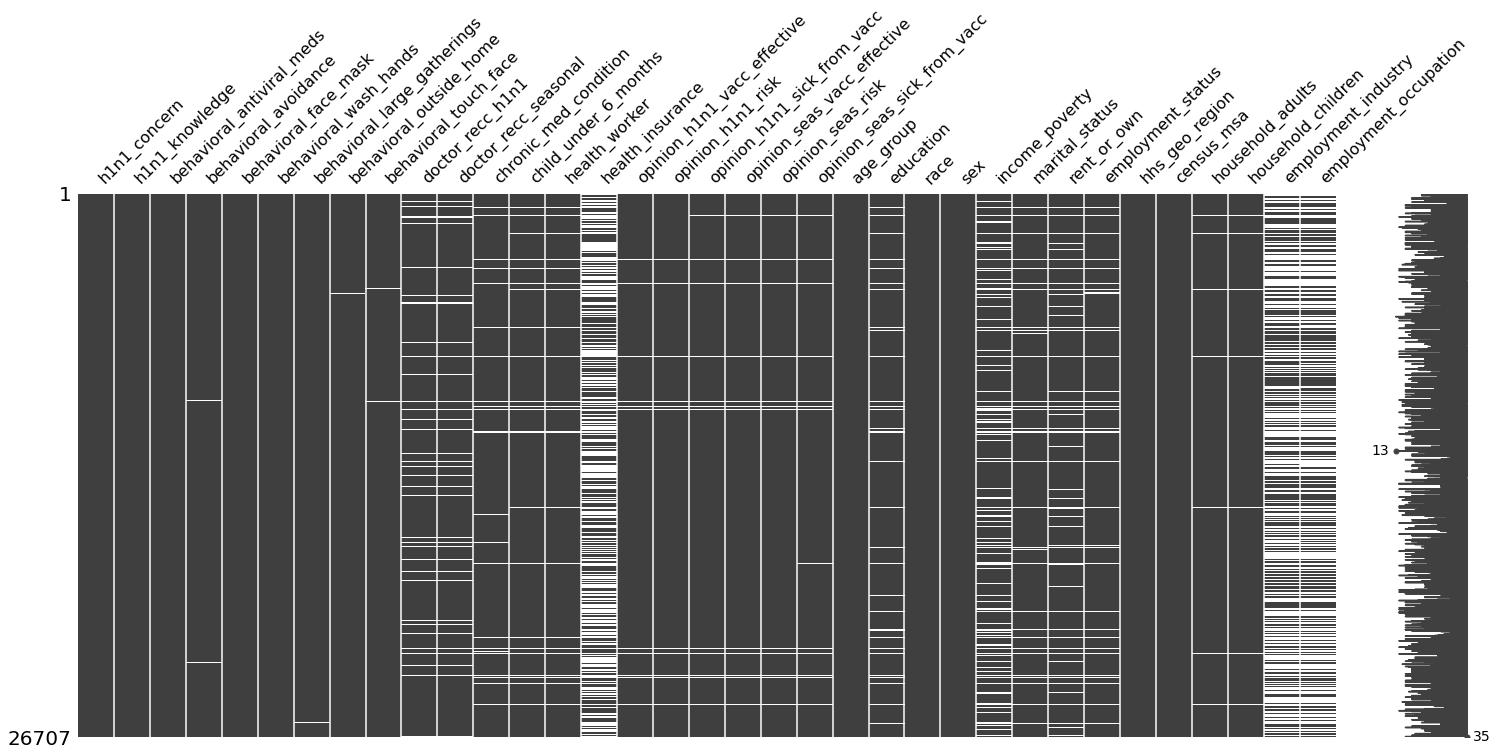

In [ ]:
ms.matrix(X)

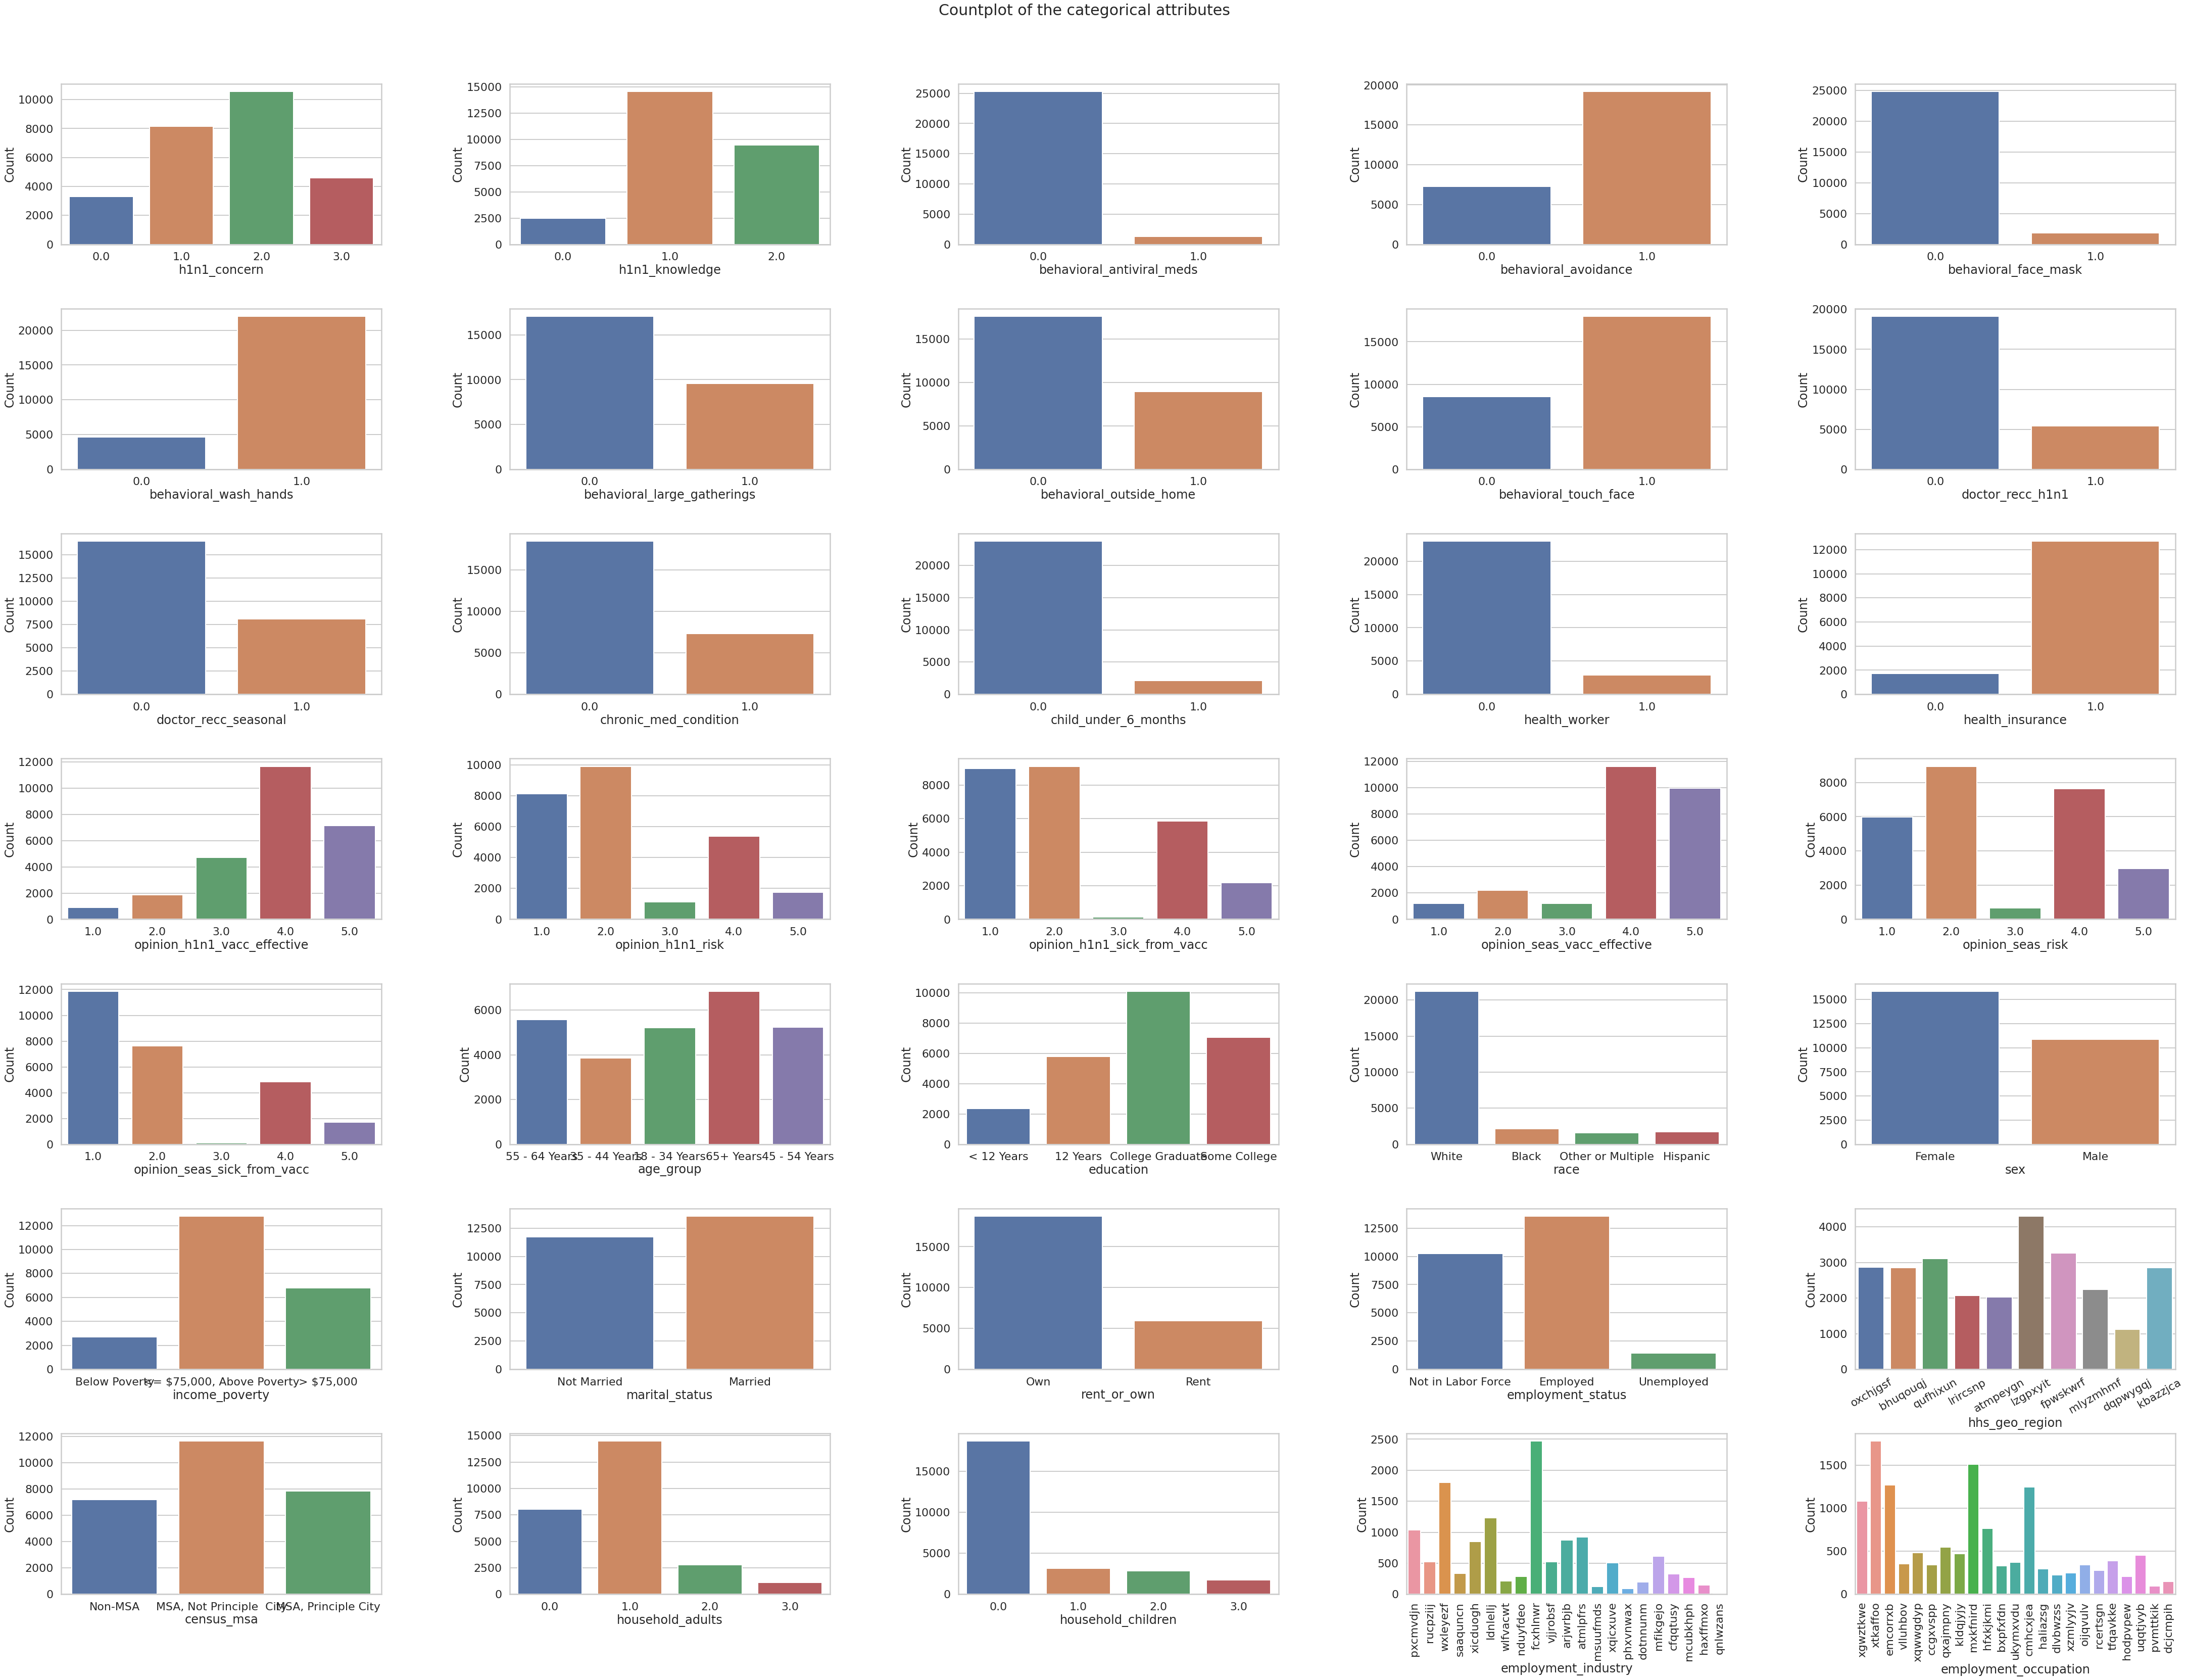

In [ ]:
sns.set(style = "whitegrid",context='poster')
fig, axes = plt.subplots(7, 5,figsize =(75,55)) #setando as subplots num formato 5x5
fig.suptitle('Countplot of the categorical attributes',y=0.92,fontsize=30) #título
fig.subplots_adjust(hspace=0.4, wspace=0.4) #espaço entre as subplots pra evitar o sumiço das labels

for i,ax in enumerate(axes.flat): #enumerate retorna um contador (i) junto ao objeto (ax) permitindo uma contagem fácil
    curr_col = cat_attrs[i]
    try:
      sns.countplot(data = df, x=curr_col, ax=ax).set(xlabel=curr_col,ylabel='Count')
      if len(df[curr_col].unique()) > 8:
        ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
      if len(df[curr_col].unique()) > 12:
        ax.set_xticklabels(ax.get_xticklabels(),rotation=90)  
    except IndexError:
      fig.delaxes(ax)

In [ ]:
per_opinion_total = df_cat.groupby(['opinion_h1n1_risk','age_group']).size().to_frame()
totals = list(df_cat.groupby(['age_group']).size().values)
totals = totals*5
per_opinion_total['1'] = per_opinion_total.apply(lambda x: (x*100)/totals, axis=0)
per_opinion_total['1'] = per_opinion_total['1'].map('{:,.2f}%'.format)
per_opinion_total.columns = ['absolute','relative']
per_opinion_total

absolute relative
opinion_h1n1_risk age_group                       
1.0               18 - 34 Years      1435   27.52%
                  35 - 44 Years      1021   26.53%
                  45 - 54 Years      1586   30.28%
                  55 - 64 Years      1712   30.77%
                  65+ Years          2385   34.85%
2.0               18 - 34 Years      2036   39.04%
                  35 - 44 Years      1445   37.55%
                  45 - 54 Years      1977   37.74%
                  55 - 64 Years      2119   38.09%
                  65+ Years          2342   34.22%
3.0               18 - 34 Years       138    2.65%
                  35 - 44 Years       104    2.70%
                  45 - 54 Years       163    3.11%
                  55 - 64 Years       202    3.63%
                  65+ Years           510    7.45%
4.0               18 - 34 Years      1119   21.46%
                  35 - 44 Years       880   22.87%
                  45 - 54 Years      1090   20.81%
                  55 - 64 Years      1110   19.95%
                  65+ Years          1195   17.46%
5.0               18 - 34 Years       395    7.57%
                  35 - 44 Years       328    8.52%
                  45 - 54 Years       361    6.89%
                  55 - 64 Years       360    6.47%
                  65+ Years           306    4.47%

In [64]:
h1n1_per_industry = df_cat.groupby(['h1n1_vaccine','employment_industry']).size().to_frame()
totals = list(df_cat.groupby(['employment_industry']).size().values)
totals = totals*2
h1n1_per_industry['1'] = h1n1_per_industry.apply(lambda x: (x*100)/totals, axis=0)
h1n1_per_industry.columns = ['absolute','relative']
per_opinion_total

absolute   relative
h1n1_vaccine employment_industry                     
0            arjwrbjb                  663  76.119403
             atmlpfrs                  802  86.609071
             cfqqtusy                  278  85.538462
             dotnnunm                  179  89.054726
             fcxhlnwr                 1486  60.210697
             haxffmxo                   56  37.837838
             ldnlellj                 1019  82.778229
             mcubkhph                  238  86.545455
             mfikgejo                  514  83.713355
             msuufmds                  106  85.483871
             nduyfdeo                  237  82.867133
             phxvnwax                   74  83.146067
             pxcmvdjn                  894  86.210222
             qnlwzans                   10  76.923077
             rucpziij                  449  85.850860
             saaquncn                  280  82.840237
             vjjrobsf                  456  86.527514
             wlfvacwt                  186  86.511628
             wxleyezf                 1361  75.443459
             xicduogh                  746  87.661575
             xqicxuve                  440  86.105675
1            arjwrbjb                  208  23.880597
             atmlpfrs                  124  13.390929
             cfqqtusy                   47  14.461538
             dotnnunm                   22  10.945274
             fcxhlnwr                  982  39.789303
             haxffmxo                   92  62.162162
             ldnlellj                  212  17.221771
             mcubkhph                   37  13.454545
             mfikgejo                  100  16.286645
             msuufmds                   18  14.516129
             nduyfdeo                   49  17.132867
             phxvnwax                   15  16.853933
             pxcmvdjn                  143  13.789778
             qnlwzans                    3  23.076923
             rucpziij                   74  14.149140
             saaquncn                   58  17.159763
             vjjrobsf                   71  13.472486
             wlfvacwt                   29  13.488372
             wxleyezf                  443  24.556541
             xicduogh                  105  12.338425
             xqicxuve                   71  13.894325

In [99]:
rel_h1n1_per_industry = per_opinion_total.loc[1,'relative']
rel_h1n1_per_industry[rel_h1n1_per_industry > 20].index

CategoricalIndex(['arjwrbjb', 'fcxhlnwr', 'haxffmxo', 'qnlwzans', 'wxleyezf'], categories=['arjwrbjb', 'atmlpfrs', 'cfqqtusy', 'dotnnunm', 'fcxhlnwr', 'haxffmxo', 'ldnlellj', 'mcubkhph', ...], ordered=False, name='employment_industry', dtype='category')

In [ ]:
df_cat.pivot_table('h1n1_vaccine',columns='opinion_h1n1_risk', index='age_group')

opinion_h1n1_risk,1.0,2.0,3.0,4.0,5.0
age_group,,,,,
18 - 34 Years,0.096167,0.126228,0.108696,0.340483,0.458228
35 - 44 Years,0.065622,0.128028,0.125000,0.364773,0.496951
45 - 54 Years,0.060530,0.146687,0.141104,0.375229,0.529086
55 - 64 Years,0.094042,0.199151,0.183168,0.463063,0.561111
65+ Years,0.107757,0.218617,0.207843,0.410042,0.513072
